# Social Media Influencers and Data Analysis

In [1]:
filterwarnings("ignore")
tf_img = io.read_file(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\social media influencers.jfif")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)

NameError: name 'filterwarnings' is not defined

## First, we are going to load the necessary packages for data analysis

In [1]:
import re
import string
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra 

import warnings
from tqdm import tqdm
import plotly.express as px
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib as plty
from tqdm.notebook import tqdm_notebook
import seaborn as sns
%matplotlib inline
from subprocess import check_output
import plotly.graph_objects as go
import plotly.figure_factory as ff
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.io import export_png
from bokeh.io import export_svgs


import nltk
import gensim
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import gensim.downloader as api
import requests
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
stop_words = stopwords.words('english')
stop = set(stopwords.words('english'))
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datasets import load_dataset, load_metric
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer 
from textblob import TextBlob
nltk.downloader.download('vader_lexicon')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from scrapy.crawler import CrawlerProcess
from scrapy.selector import Selector
import json
from nltk.stem.snowball import SnowballStemmer
st = SnowballStemmer('english')
import contractions
import PyScrappy as ps
from tqdm import tqdm
import tweepy #The Twitter API
from time import sleep
from datetime import datetime
from nltk.sentiment.util import *
from nltk import tokenize

import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.manifold import TSNE
NB = MultinomialNB()
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdstc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sdstc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sdstc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Read in the necessary csv files

In [2]:
df_instagram = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\social media influencers - instagram.csv")
df_tiktok = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\social media influencers - tiktok.csv")
df_youtube = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\social media influencers - youtube.csv")
df_instaJ22 = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\social media influencers-instagram june 2022 - june 2022.csv")
df_tiktokJ22 = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\social media influencers-tiktok june 2022 - june 2022.csv")
df_YTj22 = pd.read_csv(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\social media influencers-youtube june 2022 - june 2022.csv")

# The Top 3 Social Media Platforms of 2022

# 1. Instagram

## Top 10 Instagram Accounts by Number of Followers

In [3]:
df_instagram

Influencer insta name instagram name                 category_1  \
0                     433            433         Sports with a ball   
1            __youngbae__        TAEYANG                      Music   
2             _agentgirl_  НАСТЯ ИВЛЕЕВА                      Shows   
3             _imyour_joy            Joy                  Lifestyle   
4           _jeongjaehyun        Jaehyun                        NaN   
..                    ...            ...                        ...   
995               zendaya        Zendaya  Cinema & Actors/actresses   
996                zidane         zidane         Sports with a ball   
997                zkdlin            KAI                      Music   
998    zoeisabellakravitz   Zoë Kravitz  Cinema & Actors/actresses   
999               zoesugg      Zoë Sugg                  Lifestyle   

             category_2 Followers Audience country(mostly)  \
0                   NaN     48.5M                    Spain   
1                   NaN     12.7M                Indonesia   
2                   NaN     18.8M                   Russia   
3                   NaN     13.5M                Indonesia   
4                   NaN     11.1M                Indonesia   
..                  ...       ...                      ...   
995             Fashion    136.1M            United States   
996                 NaN     31.2M                    Spain   
997                 NaN     13.9M                Indonesia   
998                 NaN      8.2M            United States   
999  Business & Careers      9.4M           United Kingdom   

    Authentic engagement\r\n Engagement avg\r\n  
0                     383.1K               637K  
1                       478K             542.3K  
2                     310.8K             377.9K  
3                       1.1M               1.4M  
4                       2.5M               3.1M  
..                       ...                ...  
995                     6.4M               8.6M  
996                     546K             744.1K  
997                     1.3M               1.6M  
998                     583K             885.5K  
999                   208.7K             289.3K  

[1000 rows x 8 columns]

In [4]:
df_instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


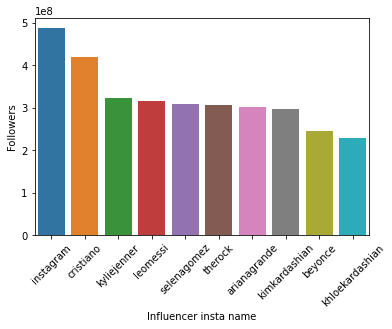

In [5]:
df_instagram.Followers = (df_instagram.Followers.replace(r'[KM]+$', '', regex=True).astype(float) * df_instagram.Followers.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int)) 

df_instagram = df_instagram.sort_values(by=['Followers'], ascending=False)
df_instagram_10 = df_instagram.head(10)

chart = sns.barplot(x="Influencer insta name", y="Followers", data=df_instagram_10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

## Top Countries According to Number in Audience

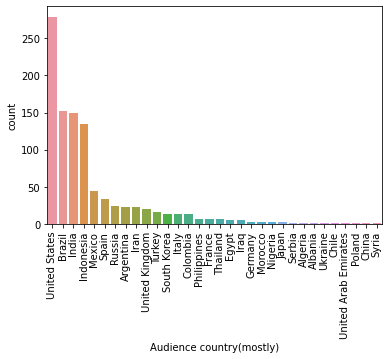

In [6]:
chart = sns.countplot(x="Audience country(mostly)", data=df_instagram, order = df_instagram['Audience country(mostly)'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [7]:
df_instagram.rename(columns = {'Authentic engagement\r\n':'authentic_engagement'}, inplace = True)
df_instagram.rename(columns = {'Engagement avg\r\n': 'overall_engagement'}, inplace = True)
df_instagram.rename(columns = {'Audience country(mostly)': 'country_audience'}, inplace = True)
df_instagram.rename(columns = {'instagram name':'influencer'}, inplace = True)
df_instagram.rename(columns = {'Influencer insta name':'account_name'}, inplace = True)

In [8]:
df_instagram

account_name         influencer          category_1  \
388       instagram          Instagram         Photography   
203       cristiano  Cristiano Ronaldo  Sports with a ball   
510     kyliejenner            Kylie 🤍             Fashion   
532        leomessi          Leo Messi  Sports with a ball   
814     selenagomez       Selena Gomez               Music   
..              ...                ...                 ...   
255     drewstarkey       Drew Starkey                 NaN   
316  georgenotfound     GeorgeNotFound                 NaN   
7          _seorina   설인아 sᴇᴏʀɪɴᴀ           Lifestyle   
337   haechanahceah            HAECHAN                 NaN   
26         adinross                NaN                 NaN   

                    category_2    Followers country_audience  \
388                        NaN  487200000.0            India   
203                        NaN  419600000.0            India   
510                   Modeling  323300000.0    United States   
532                     Family  315400000.0        Argentina   
814                  Lifestyle  308200000.0    United States   
..                         ...          ...              ...   
255                        NaN    3200000.0    United States   
316                        NaN    3100000.0    United States   
7    Cinema & Actors/actresses    3000000.0      South Korea   
337                        NaN    2700000.0              NaN   
26                         NaN    2600000.0    United States   

    authentic_engagement overall_engagement  
388               352.3K             467.4K  
203                 5.7M                 7M  
510                 7.6M              12.3M  
532                   4M               5.3M  
814                 3.3M               4.4M  
..                   ...                ...  
255               630.2K               1.2M  
316               997.8K               1.1M  
7                 803.9K             997.8K  
337                    0               2.1M  
26                551.1K               1.1M  

[1000 rows x 8 columns]

## Data Visualizations of Authentic vs Overall Engagement of Influencers

In [9]:
df_instagram.authentic_engagement.astype(str)

388    352.3K
203      5.7M
510      7.6M
532        4M
814      3.3M
        ...  
255    630.2K
316    997.8K
7      803.9K
337         0
26     551.1K
Name: authentic_engagement, Length: 1000, dtype: object

In [10]:
df_instagram.overall_engagement.astype(str)

388    467.4K
203        7M
510     12.3M
532      5.3M
814      4.4M
        ...  
255      1.2M
316      1.1M
7      997.8K
337      2.1M
26       1.1M
Name: overall_engagement, Length: 1000, dtype: object

In [11]:
df_instagram.authentic_engagement = (df_instagram.authentic_engagement.replace(r'[KM]+$', '', regex=True).astype(float) * df_instagram.authentic_engagement.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int)) 

In [12]:
df_instagram.overall_engagement = (df_instagram.overall_engagement.replace(r'[KM]+$', '', regex=True).astype(float) * df_instagram.overall_engagement.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int)) 

In [13]:
df_instagram

account_name         influencer          category_1  \
388       instagram          Instagram         Photography   
203       cristiano  Cristiano Ronaldo  Sports with a ball   
510     kyliejenner            Kylie 🤍             Fashion   
532        leomessi          Leo Messi  Sports with a ball   
814     selenagomez       Selena Gomez               Music   
..              ...                ...                 ...   
255     drewstarkey       Drew Starkey                 NaN   
316  georgenotfound     GeorgeNotFound                 NaN   
7          _seorina   설인아 sᴇᴏʀɪɴᴀ           Lifestyle   
337   haechanahceah            HAECHAN                 NaN   
26         adinross                NaN                 NaN   

                    category_2    Followers country_audience  \
388                        NaN  487200000.0            India   
203                        NaN  419600000.0            India   
510                   Modeling  323300000.0    United States   
532                     Family  315400000.0        Argentina   
814                  Lifestyle  308200000.0    United States   
..                         ...          ...              ...   
255                        NaN    3200000.0    United States   
316                        NaN    3100000.0    United States   
7    Cinema & Actors/actresses    3000000.0      South Korea   
337                        NaN    2700000.0              NaN   
26                         NaN    2600000.0    United States   

     authentic_engagement  overall_engagement  
388              352300.0            467400.0  
203             5700000.0           7000000.0  
510             7600000.0          12300000.0  
532             4000000.0           5300000.0  
814             3300000.0           4400000.0  
..                    ...                 ...  
255              630200.0           1200000.0  
316              997800.0           1100000.0  
7                803900.0            997800.0  
337                   0.0           2100000.0  
26               551100.0           1100000.0  

[1000 rows x 8 columns]

C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


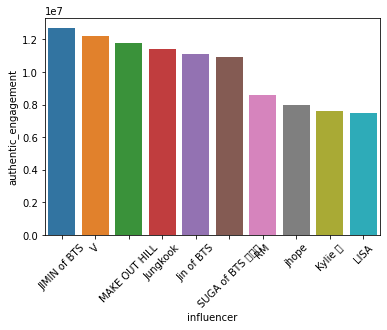

In [14]:
df_instagram = df_instagram.sort_values(by=['authentic_engagement'], ascending=False);
chart = sns.barplot(x="influencer", y="authentic_engagement", data=df_instagram.head(10));
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


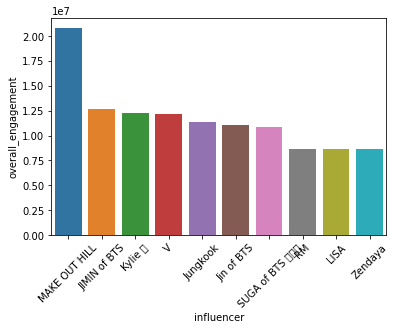

In [15]:
df_instagram = df_instagram.sort_values(by=['overall_engagement'], ascending=False);
chart = sns.barplot(x="influencer", y="overall_engagement", data=df_instagram.head(10));
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [16]:
df_instagram10 = df_instagram.head(10)
df_instagram10

account_name       influencer                 category_1 category_2  \
968  xxxtentacion    MAKE OUT HILL                      Music        NaN   
396           j.m     JIMIN of BTS                        NaN        NaN   
510   kyliejenner          Kylie 🤍                    Fashion   Modeling   
903           thv                V                        NaN        NaN   
457   jungkook.97         Jungkook                        NaN        NaN   
432           jin       Jin of BTS                        NaN        NaN   
28         agustd  SUGA of BTS 민윤기                        NaN        NaN   
780         rkive               RM                        NaN        NaN   
519  lalalalisa_m             LISA                      Music        NaN   
995       zendaya          Zendaya  Cinema & Actors/actresses    Fashion   

       Followers country_audience  authentic_engagement  overall_engagement  
968   20200000.0    United States            11800000.0          20800000.0  
396   32700000.0              NaN            12700000.0          12700000.0  
510  323300000.0    United States             7600000.0          12300000.0  
903   38100000.0              NaN            12200000.0          12200000.0  
457   35800000.0              NaN            11400000.0          11400000.0  
432   32000000.0    United States            11100000.0          11100000.0  
28    31500000.0              NaN            10900000.0          10900000.0  
780   31300000.0              NaN             8600000.0           8600000.0  
519   75700000.0        Indonesia             7500000.0           8600000.0  
995  136100000.0    United States             6400000.0           8600000.0

C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50980 (\N{HANGUL SYLLABLE YUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Python3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


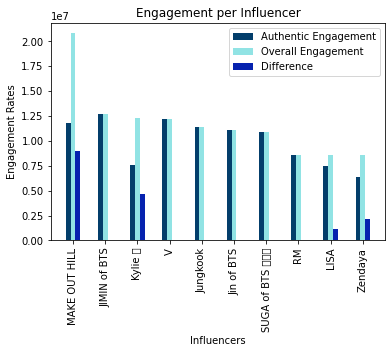

In [17]:
    # Initialise a figure. subplots() with no args gives one plot.
fig, ax = plt.subplots()

    # A little data preparation
influencers = df_instagram10['influencer']
x = np.arange(len(influencers))

top10insta_AE = df_instagram10['authentic_engagement']
top10insta_OE = df_instagram10['overall_engagement']
top10insta_diff = top10insta_OE - top10insta_AE

N = 10
ind = np.arange(N) 
width = 0.15
  
xvals = top10insta_AE
bar1 = plt.bar(ind, xvals, width, color = '#033e6b')
  
yvals = top10insta_OE
bar2 = plt.bar(ind+width, yvals, width, color='#91e3e4')
  
zvals = top10insta_diff
bar3 = plt.bar(ind+width*2, zvals, width, color = '#0622af')
  
plt.xlabel("Influencers")
plt.ylabel('Engagement Rates')
plt.title("Engagement per Influencer")
  
plt.xticks(ind+width, influencers, rotation='vertical')
plt.legend( (bar1, bar2, bar3), ('Authentic Engagement', 'Overall Engagement', 'Difference') )
plt.show()

In [18]:
df_instagram.category_1.unique()

array(['Music', nan, 'Fashion', 'Cinema & Actors/actresses',
       'Sports with a ball', 'Modeling', 'Lifestyle', 'Art/Artists',
       'Business & Careers', 'Fitness & Gym', 'Shows',
       'Management & Marketing', 'Beauty', 'Finance & Economics',
       'Computers & Gadgets', 'Humor & Fun & Happiness', 'Racing Sports',
       'Clothing & Outfits', 'Family', 'Photography', 'Food & Cooking',
       'Science', 'Education', 'Literature & Journalism', 'Adult content',
       'Cars & Motorbikes', 'Kids & Toys', 'Machinery & Technologies',
       'Animals', 'Luxury', 'Nature & landscapes',
       'Accessories & Jewellery'], dtype=object)

In [19]:
df_instagram.category_2.unique()

array([nan, 'Modeling', 'Fashion', 'Beauty', 'Family', 'Lifestyle',
       'Cinema & Actors/actresses', 'Music', 'Art/Artists', 'Shows',
       'Humor & Fun & Happiness', 'Business & Careers', 'Adult content',
       'Clothing & Outfits', 'Machinery & Technologies', 'Photography',
       'Sports with a ball', 'Luxury', 'Kids & Toys',
       'Trainers & Coaches', 'Fitness & Gym', 'Computers & Gadgets',
       'Comics & sketches', 'Cars & Motorbikes', 'Finance & Economics',
       'Shopping & Retail', 'Literature & Journalism', 'Science'],
      dtype=object)

In [20]:
df_instagram['category_1'].fillna(0, inplace=True)
df_instagram['category_2'].fillna(0, inplace=True)

In [21]:
df_instagram.category_2.unique()

array([0, 'Modeling', 'Fashion', 'Beauty', 'Family', 'Lifestyle',
       'Cinema & Actors/actresses', 'Music', 'Art/Artists', 'Shows',
       'Humor & Fun & Happiness', 'Business & Careers', 'Adult content',
       'Clothing & Outfits', 'Machinery & Technologies', 'Photography',
       'Sports with a ball', 'Luxury', 'Kids & Toys',
       'Trainers & Coaches', 'Fitness & Gym', 'Computers & Gadgets',
       'Comics & sketches', 'Cars & Motorbikes', 'Finance & Economics',
       'Shopping & Retail', 'Literature & Journalism', 'Science'],
      dtype=object)

In [22]:
df_instagram.category_1.unique()

array(['Music', 0, 'Fashion', 'Cinema & Actors/actresses',
       'Sports with a ball', 'Modeling', 'Lifestyle', 'Art/Artists',
       'Business & Careers', 'Fitness & Gym', 'Shows',
       'Management & Marketing', 'Beauty', 'Finance & Economics',
       'Computers & Gadgets', 'Humor & Fun & Happiness', 'Racing Sports',
       'Clothing & Outfits', 'Family', 'Photography', 'Food & Cooking',
       'Science', 'Education', 'Literature & Journalism', 'Adult content',
       'Cars & Motorbikes', 'Kids & Toys', 'Machinery & Technologies',
       'Animals', 'Luxury', 'Nature & landscapes',
       'Accessories & Jewellery'], dtype=object)

In [23]:
df_instagram.category_1.info()

<class 'pandas.core.series.Series'>
Int64Index: 1000 entries, 968 to 889
Series name: category_1
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


In [24]:
df_instagram.category_2.info()

<class 'pandas.core.series.Series'>
Int64Index: 1000 entries, 968 to 889
Series name: category_2
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


In [25]:
valuecat1 = df_instagram['category_1'].value_counts()

In [26]:
valuecat2 = df_instagram['category_2'].value_counts()

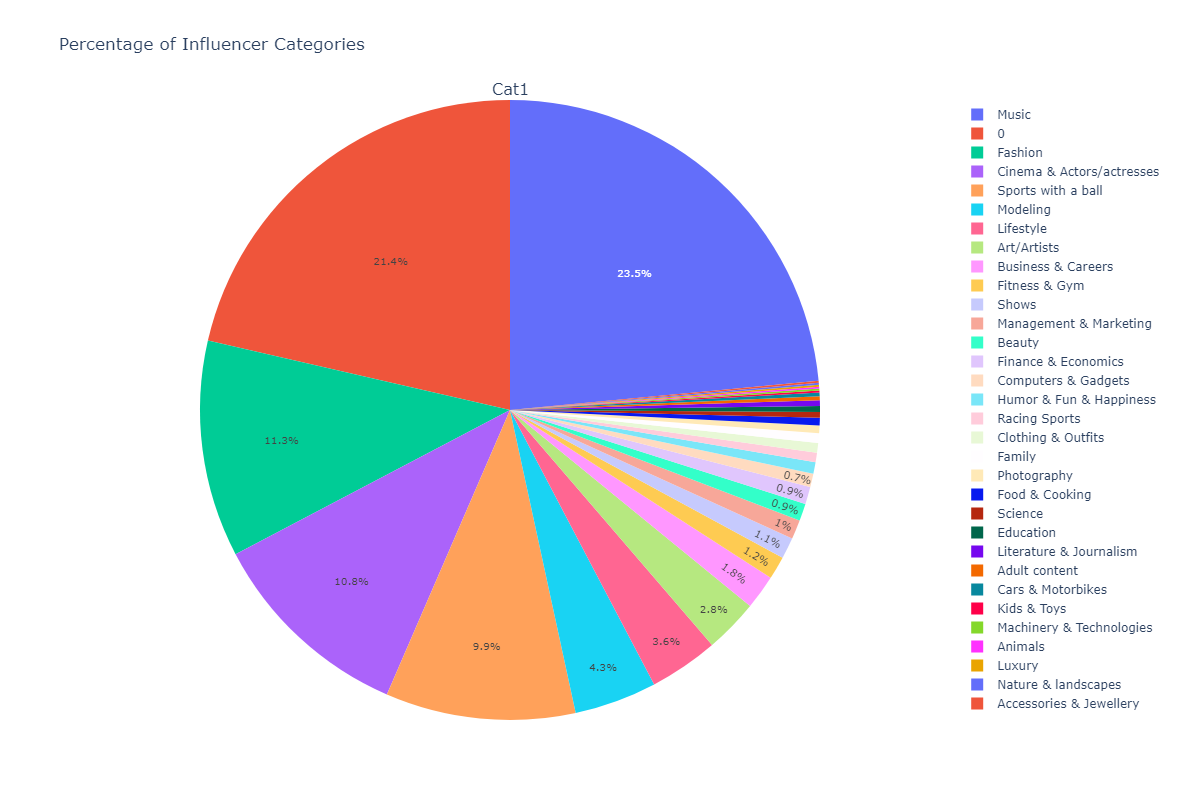

In [27]:
from plotly.subplots import make_subplots

labels = ['Music', 0, 'Fashion', 'Cinema & Actors/actresses',
       'Sports with a ball', 'Modeling', 'Lifestyle', 'Art/Artists',
       'Business & Careers', 'Fitness & Gym', 'Shows',
       'Management & Marketing', 'Beauty', 'Finance & Economics',
       'Computers & Gadgets', 'Humor & Fun & Happiness', 'Racing Sports',
       'Clothing & Outfits', 'Family', 'Photography', 'Food & Cooking',
       'Science', 'Education', 'Literature & Journalism', 'Adult content',
       'Cars & Motorbikes', 'Kids & Toys', 'Machinery & Technologies',
       'Animals', 'Luxury', 'Nature & landscapes',
       'Accessories & Jewellery']
labels2 = [0, 'Modeling', 'Fashion', 'Beauty', 'Family', 'Lifestyle',
       'Cinema & Actors/actresses', 'Music', 'Art/Artists', 'Shows',
       'Humor & Fun & Happiness', 'Business & Careers', 'Adult content',
       'Clothing & Outfits', 'Machinery & Technologies', 'Photography',
       'Sports with a ball', 'Luxury', 'Kids & Toys',
       'Trainers & Coaches', 'Fitness & Gym', 'Computers & Gadgets',
       'Comics & sketches', 'Cars & Motorbikes', 'Finance & Economics',
       'Shopping & Retail', 'Literature & Journalism', 'Science']

fig1 = make_subplots(1, 1, specs=[[{'type':'domain'}]],
                    subplot_titles=['Cat1'])
fig1.add_trace(go.Pie(labels=labels, values=valuecat1, scalegroup='one',
                     name="Primary Categories"), 1, 1)

fig1.update_layout(title_text='Percentage of Influencer Categories')
fig1.update_traces(textposition='inside')
fig1.update_layout(
    height=800,
    width=630,
    uniformtext_minsize=10, uniformtext_mode='hide',
    legend=dict(font=dict(size=12)))

fig1.show()

In [28]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
pip install selenium phantomjs pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


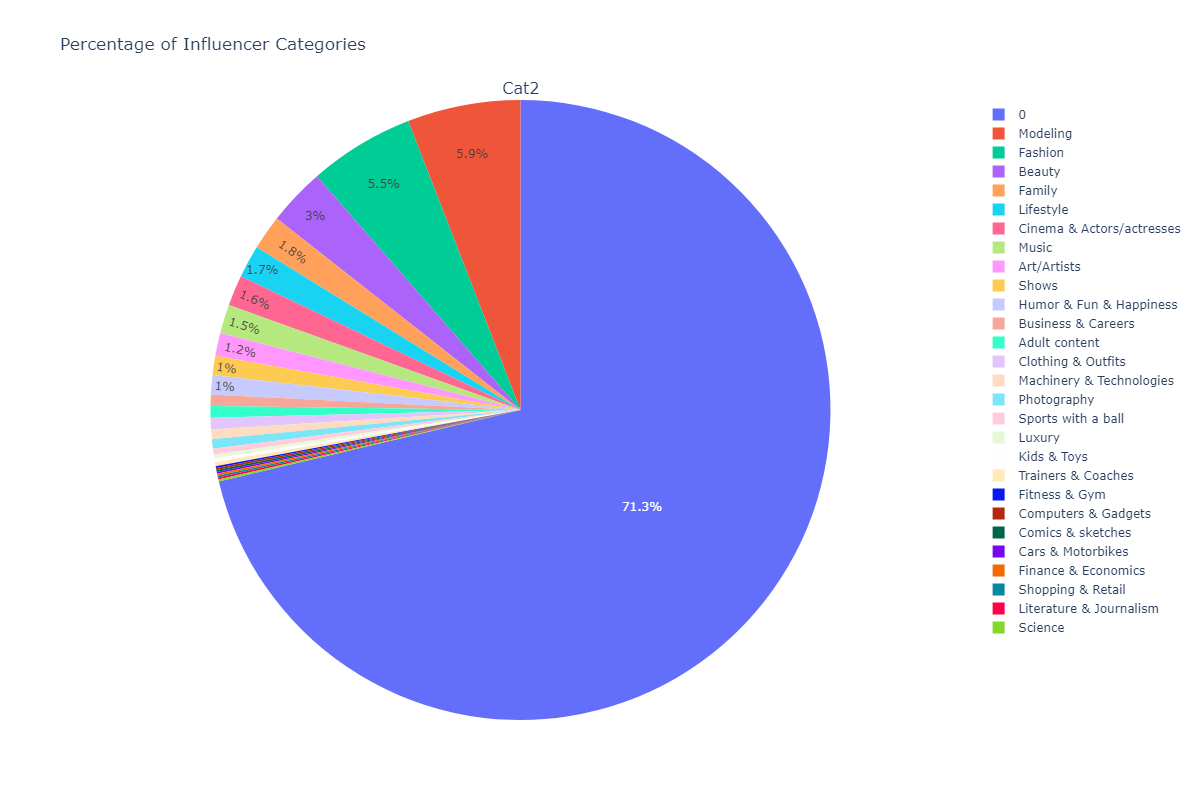

In [30]:
fig2 = make_subplots(1, 1, specs=[[{'type':'domain'}]],
                    subplot_titles=['Cat2'])
fig2.add_trace(go.Pie(labels=labels2, values=valuecat2, scalegroup='one',
                     name="Secondary Categories"), 1, 1)

fig2.update_layout(title_text='Percentage of Influencer Categories')
fig2.update_traces(textposition='inside')
fig2.update_layout(
    height=800,
    width=630,
    uniformtext_minsize=10, uniformtext_mode='hide',
    legend=dict(font=dict(size=12)))

fig2.show()

# YouTube

## Top 10 YouTuber Accounts by Number of Subscribers

In [31]:
df_youtube

youtuber name                channel name       Category Subscribers  \
0         tseries                    T-Series  Music & Dance      212.1M   
1       checkgate  Cocomelon - Nursery Rhymes      Education      132.1M   
2        setindia                   SET India            NaN      130.4M   
3       PewDiePie                   PewDiePie      Animation      111.4M   
4     MrBeast6000                     MrBeast    Video games       92.5M   
..            ...                         ...            ...         ...   
995   FutParódias                 FutParódias  Music & Dance        9.2M   
996       EL GATO                     EL GATO           Toys        9.2M   
997    CinemaSins                  CinemaSins         Movies        9.2M   
998    CricketICC                         ICC         Sports        9.2M   
999       BRKsEDU                     BRKsEDU      Animation        9.2M   

    Audience Country avg views avg likes avg comments  
0              India    323.7K      9.8K          290  
1                NaN     13.8M     80.9K          NaN  
2              India     23.6K       314           21  
3      United States      1.4M     80.8K         4.6K  
4      United States     30.6M      1.7M        67.7K  
..               ...       ...       ...          ...  
995           Brazil      1.4M    110.1K         2.5K  
996           Brazil    243.8K     30.7K          636  
997    United States      296K     10.2K          874  
998            India     15.2K       854           58  
999           Brazil    112.3K      9.8K          246  

[1000 rows x 8 columns]

In [32]:
df_youtube.Subscribers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Subscribers
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [33]:
df_youtube['Subscribers'] = df_youtube.Subscribers.astype(str)

In [34]:
df_youtube.Subscribers = (df_youtube.Subscribers.replace(r'[KM]+$', '', regex=True).astype(float) * df_youtube.Subscribers.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int)) 

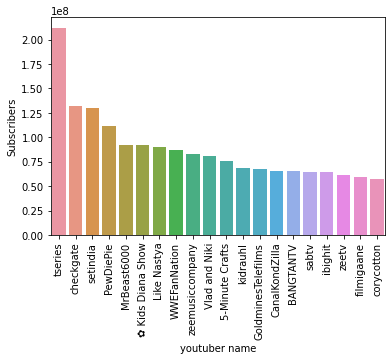

In [35]:
chart = sns.barplot(x="youtuber name", y="Subscribers", data=df_youtube.head(20));
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

## Number of Subscribers Per Country

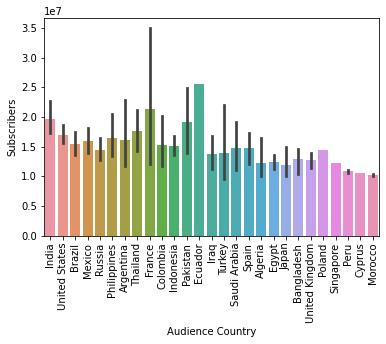

In [36]:
chart = sns.barplot(x="Audience Country", y="Subscribers", data=df_youtube);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

## Audience Number by Country

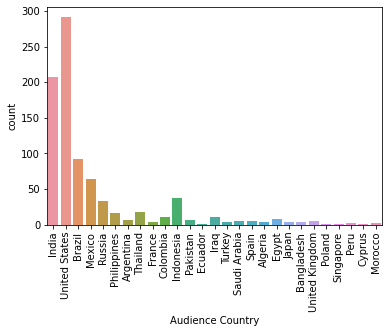

In [37]:
chart = sns.countplot(x="Audience Country", data=df_youtube);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

# TikTok

## Top 10 TikTok Accounts by Number of Subscribers

In [64]:
df_tiktok.head()

Tiktoker name      Tiktok name  Subscribers count  Views avg.  Likes avg  \
3   charlidamelio  charli d’amelio        135400000.0  18700000.0  2600000.0   
6      khaby.lame     Khabane lame        135200000.0  17700000.0  2300000.0   
31    bellapoarch     Bella Poarch         88500000.0  11100000.0  1000000.0   
27      addisonre      Addison Rae         87300000.0   9300000.0  1200000.0   
63      willsmith       Will Smith         67400000.0   6900000.0   658500.0   

    Comments avg.  Shares avg  
3         54700.0     35200.0  
6         18000.0     11200.0  
31        14300.0      1600.0  
27        13400.0      5900.0  
63        10000.0      2000.0

In [69]:
df_tiktok['Subscribers count'] = (df_tiktok['Subscribers count'].replace(r'[KM]+$', '', regex=True).astype(float) * df_tiktok['Subscribers count'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

AttributeError: Can only use .str accessor with string values!

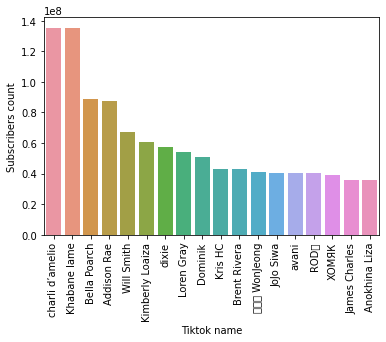

In [68]:
df_tiktok = df_tiktok.sort_values(by=['Subscribers count'], ascending=False);
chart = sns.barplot(x="Tiktok name", y="Subscribers count", data=df_tiktok.head(20));
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [40]:
df_tiktok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3 to 427
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tiktoker name      1000 non-null   object 
 1   Tiktok name        998 non-null    object 
 2   Subscribers count  1000 non-null   float64
 3   Views avg.         1000 non-null   object 
 4   Likes avg          1000 non-null   object 
 5   Comments avg.      1000 non-null   object 
 6   Shares avg         1000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 62.5+ KB


In [41]:
df_tiktok.shape

(1000, 7)

In [42]:
print(df_tiktok['Subscribers count'].dtype)

float64


In [43]:
df_tiktok

Tiktoker name        Tiktok name  Subscribers count Views avg.  \
3     charlidamelio    charli d’amelio        135400000.0      18.7M   
6        khaby.lame       Khabane lame        135200000.0      17.7M   
31      bellapoarch       Bella Poarch         88500000.0      11.1M   
27        addisonre        Addison Rae         87300000.0       9.3M   
63        willsmith         Will Smith         67400000.0       6.9M   
..              ...                ...                ...        ...   
573       .mats.ftl  ❤️‍🔥Лёша Мэтс❤️‍🔥             6700.0       1.7M   
750       .shuberrr          максончиq             5800.0         2M   
511    blake.snider       Blake Snider             4600.0       2.8M   
835  bestluxurycars     Bestluxurycars             3000.0     769.5K   
427       ermmm.umm   user569215425698             2100.0       1.9M   

    Likes avg Comments avg. Shares avg  
3        2.6M         54.7K      35.2K  
6        2.3M           18K      11.2K  
31         1M         14.3K       1.6K  
27       1.2M         13.4K       5.9K  
63     658.5K           10K         2K  
..        ...           ...        ...  
573    210.2K          1.7K       4.6K  
750    152.7K          2.1K       2.8K  
511    150.7K           967       5.5K  
835    136.9K          1.4K      10.2K  
427    254.5K          2.3K       4.8K  

[1000 rows x 7 columns]

# Recode numbers with K to multiplying by 1000 and numbers with M to multiplying by 1000000 for numerical data

In [44]:
df_tiktok['Likes avg'] = (df_tiktok['Likes avg'].replace(r'[KM]+$', '', regex=True).astype(float) * df_tiktok['Likes avg'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df_tiktok['Comments avg.'] = (df_tiktok['Comments avg.'].replace(r'[KM]+$', '', regex=True).astype(float) * df_tiktok['Comments avg.'].str.extract(r'[\d\.]+([KM]+)', expand = False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df_tiktok['Shares avg'] = (df_tiktok['Shares avg'].replace(r'[KM]+$', '', regex=True).astype(float) * df_tiktok['Shares avg'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df_tiktok['Views avg.'] = (df_tiktok['Views avg.'].replace(r'[KM]+$', '', regex=True).astype(float) * df_tiktok['Views avg.'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [45]:
df_tiktok

Tiktoker name        Tiktok name  Subscribers count  Views avg.  \
3     charlidamelio    charli d’amelio        135400000.0  18700000.0   
6        khaby.lame       Khabane lame        135200000.0  17700000.0   
31      bellapoarch       Bella Poarch         88500000.0  11100000.0   
27        addisonre        Addison Rae         87300000.0   9300000.0   
63        willsmith         Will Smith         67400000.0   6900000.0   
..              ...                ...                ...         ...   
573       .mats.ftl  ❤️‍🔥Лёша Мэтс❤️‍🔥             6700.0   1700000.0   
750       .shuberrr          максончиq             5800.0   2000000.0   
511    blake.snider       Blake Snider             4600.0   2800000.0   
835  bestluxurycars     Bestluxurycars             3000.0    769500.0   
427       ermmm.umm   user569215425698             2100.0   1900000.0   

     Likes avg  Comments avg.  Shares avg  
3    2600000.0        54700.0     35200.0  
6    2300000.0        18000.0     11200.0  
31   1000000.0        14300.0      1600.0  
27   1200000.0        13400.0      5900.0  
63    658500.0        10000.0      2000.0  
..         ...            ...         ...  
573   210200.0         1700.0      4600.0  
750   152700.0         2100.0      2800.0  
511   150700.0          967.0      5500.0  
835   136900.0         1400.0     10200.0  
427   254500.0         2300.0      4800.0  

[1000 rows x 7 columns]

# The top 10 Most followed Tiktokers

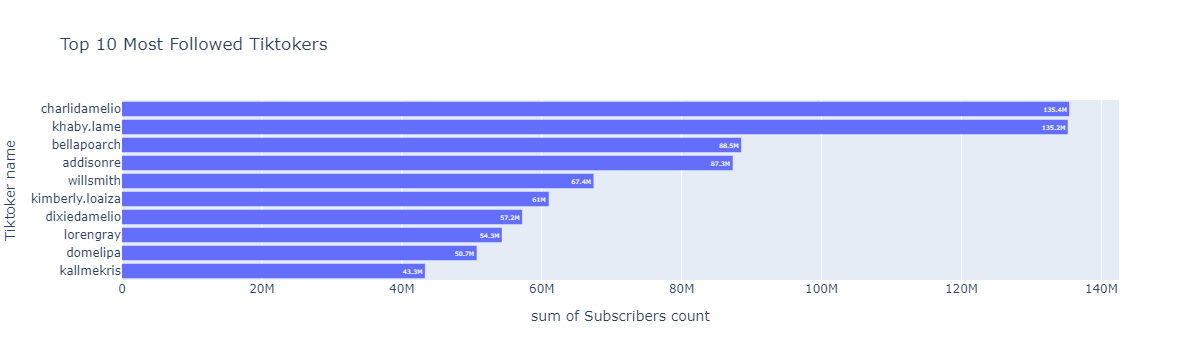

In [46]:
sorted_by_subscribers_df=df_tiktok.sort_values(by='Subscribers count')
fig = px.histogram(sorted_by_subscribers_df.tail(10), 
                   y="Tiktoker name", 
                   x='Subscribers count',
                   text_auto=True,
                   title='Top 10 Most Followed Tiktokers')
fig.show()

In [47]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from warnings import filterwarnings
from tensorflow import io
from tensorflow import image

<dtype: 'uint8'>


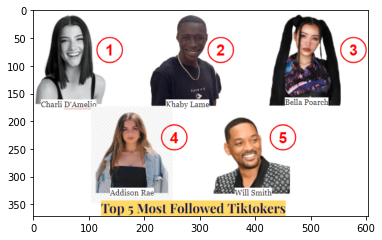

In [49]:
filterwarnings("ignore")
tf_img = io.read_file(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\top5tiktok.png")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)

# Top 10 Most Viewed TikTokers

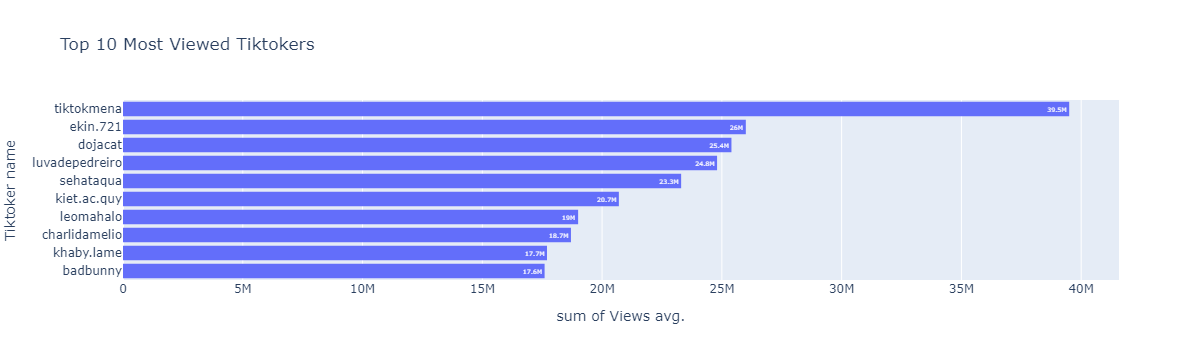

In [50]:
sorted_by_views_df=df_tiktok.sort_values(by='Views avg.')
fig = px.histogram(sorted_by_views_df.tail(10), 
                   y="Tiktoker name", 
                   x='Views avg.',
                   text_auto=True,
                   title='Top 10 Most Viewed Tiktokers')
fig.show()

<dtype: 'uint8'>


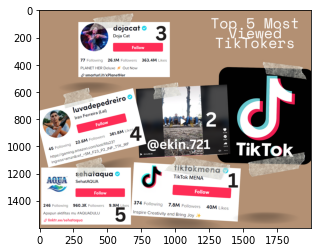

In [51]:
filterwarnings("ignore")
tf_img = io.read_file(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\top5tiktokviews.png")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)

# Top 10 Most Liked TikToks

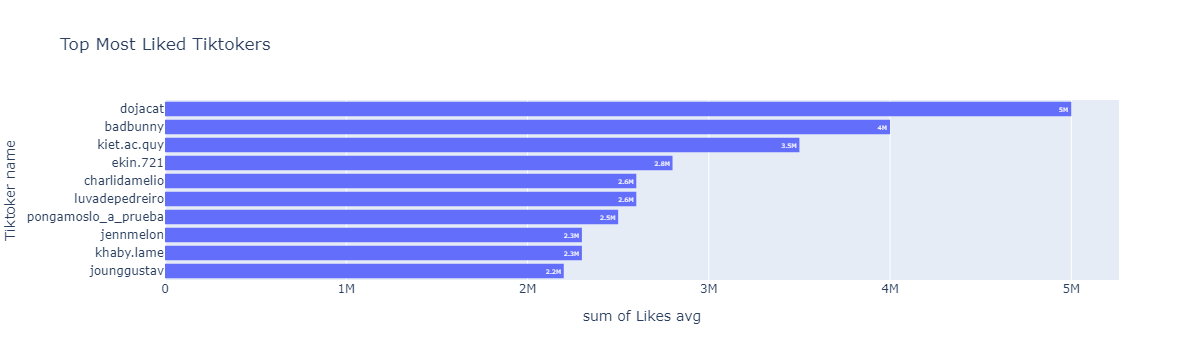

In [52]:
sorted_by_likes_df=df_tiktok.sort_values(by='Likes avg')
fig = px.histogram(sorted_by_likes_df.tail(10), 
                   y="Tiktoker name", 
                   x='Likes avg',
                   text_auto=True,
                   title='Top Most Liked Tiktokers')
fig.show()

<dtype: 'uint8'>


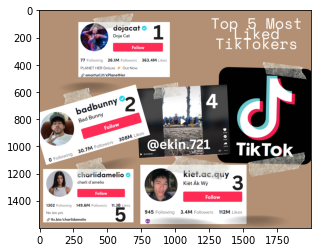

In [53]:
filterwarnings("ignore")
tf_img = io.read_file(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\top5tiktoklikes.png")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)

# Top 10 Most Commented TikTokers

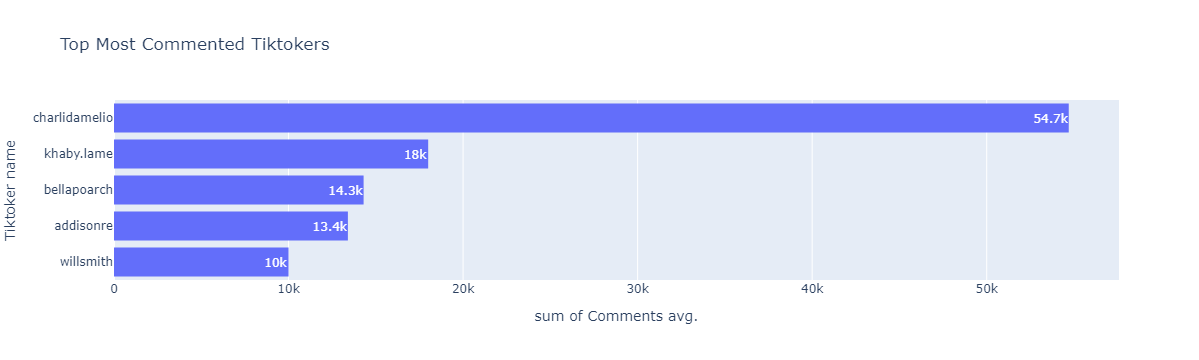

In [54]:
sorted_by_comments_df=df_tiktok.sort_values(by='Comments avg.')
fig = px.histogram(sorted_by_subscribers_df.tail(), 
                   y="Tiktoker name", 
                   x='Comments avg.',
                   text_auto=True,
                   title='Top Most Commented Tiktokers')
fig.show()

<dtype: 'uint8'>


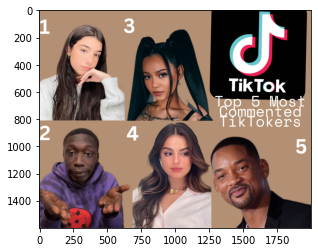

In [55]:
filterwarnings("ignore")
tf_img = io.read_file(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\top5tiktokcomments.png")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)

# Top Most Shared Tiktokers

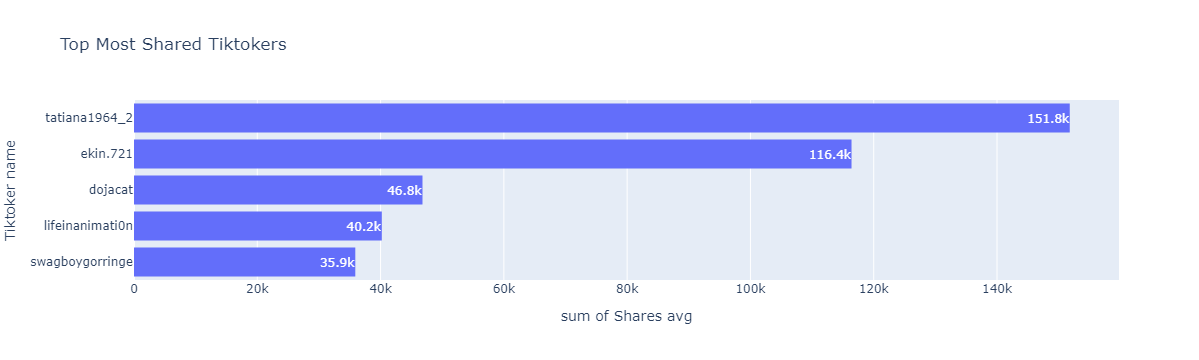

In [56]:
sorted_by_shares_df=df_tiktok.sort_values(by='Shares avg')
fig = px.histogram(sorted_by_shares_df.tail(), 
                   y="Tiktoker name", 
                   x='Shares avg',
                   text_auto=True,
                   title='Top Most Shared Tiktokers')
fig.show()

<dtype: 'uint8'>


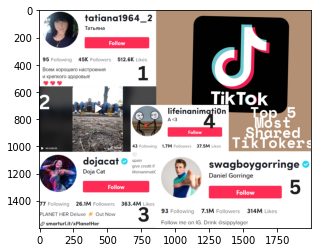

In [57]:
filterwarnings("ignore")
tf_img = io.read_file(r"C:\Users\sdstc\Documents\Education\Other\Career and Upskilling\Entity Academy\Portfolio\Social Media Influencer Analysis\Social Media Influencers\top5tiktokshares.png")
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)

# Correlation HeatMap - Reveals the correlation between subscriber count, comments, shares, like, and views

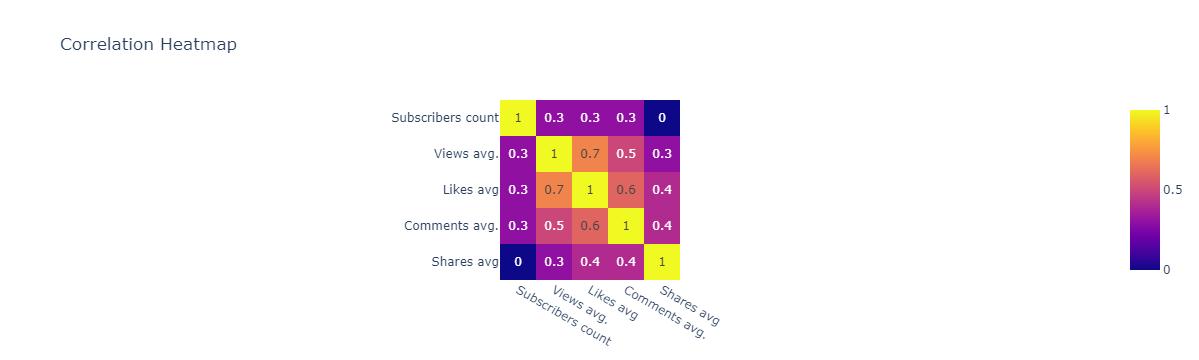

In [58]:
fig = px.imshow(round(df_tiktok.corr(),1),
                text_auto=True,
                title='Correlation Heatmap')
fig.show()